In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas_datareader import data, wb
from pandas.tools.plotting import autocorrelation_plot
from pandas.tools.plotting import scatter_matrix
import datetime
%matplotlib inline

We will use pandas_datareader to read the last 5 years data for the S&P 500, NYSE, Dow Jones Industrial Average, Nikkei 225, Hang Seng, FTSE 100, DAX, All Ordinaries indices.

In [27]:
start = datetime.datetime(2011,1,1)
end = datetime.datetime(2016,1,1)

In [28]:
SP500 = data.DataReader (name="^GSPC", data_source='yahoo', start=start, end=end)
NYSE = data.DataReader (name="^NYA", data_source='yahoo', start=start, end=end)
DAX = data.DataReader (name="^GDAXI", data_source='yahoo', start=start, end=end)
HSI = data.DataReader (name="^HSI", data_source='yahoo', start=start, end=end)
FTSE = data.DataReader (name="^FTSE", data_source='yahoo', start=start, end=end)
DJI = data.DataReader (name="^DJI", data_source='yahoo', start=start, end=end)
AORD = data.DataReader (name="^AORD", data_source='yahoo', start=start, end=end)
N225 = data.DataReader (name="^N225", data_source='yahoo', start=start, end=end)

Create a new dataframe to store the closing prices. Forward fill if there is gap existing.

In [29]:
closing_data = pd.DataFrame()
closing_data['SP500_close'] = SP500['Close']
closing_data['NYSE_close'] = NYSE['Close']
closing_data['DJI_close'] = DJI['Close']
closing_data['FTSE_close'] = FTSE['Close']
closing_data['DAX_close'] = DAX['Close']
closing_data['HSI_close'] = HSI['Close']
closing_data['AORD_close'] = AORD['Close']
closing_data['N225_close'] = N225['Close']

# There is NaN record, majorly due to bank holidays. And we need to fill in value for later analysis convenience.
# forward fill NaN data. For those with a starting NaN, backward fill
closing_data.fillna(method='ffill', inplace=True)
closing_data.fillna(method='bfill', inplace=True)

In [30]:
# Scale the value of each day by dividing with the max value of corresponding index. Add that column into the dataframe

closing_data['SP500_close_scaled'] = closing_data['SP500_close'] / max(closing_data['SP500_close'])
closing_data['NYSE_close_scaled'] = closing_data['NYSE_close'] / max(closing_data['NYSE_close'])
closing_data['DJI_close_scaled'] = closing_data['DJI_close'] / max(closing_data['DJI_close'])
closing_data['FTSE_close_scaled'] = closing_data['FTSE_close'] / max(closing_data['FTSE_close'])
closing_data['DAX_close_scaled'] = closing_data['DAX_close'] / max(closing_data['DAX_close'])
closing_data['HSI_close_scaled'] = closing_data['HSI_close'] / max(closing_data['HSI_close'])
closing_data['AORD_close_scaled'] = closing_data['AORD_close'] / max(closing_data['AORD_close'])
closing_data['N225_close_scaled'] = closing_data['N225_close'] / max(closing_data['N225_close'])

closing_data.head()

,SP500_close,NYSE_close,DJI_close,FTSE_close,DAX_close,HSI_close,AORD_close,N225_close,SP500_close_scaled,NYSE_close_scaled,DJI_close_scaled,FTSE_close_scaled,DAX_close_scaled,HSI_close_scaled,AORD_close_scaled,N225_close_scaled
Date,,,,,,,,,,,,,,,,
2011-01-03,1271.869995,8043.970215,11670.750000,5899.899902,6989.740234,23436.050781,4849.500000,10398.099609,0.596892,0.715677,0.637314,0.830504,0.564840,0.823973,0.814385,0.498279
2011-01-04,1270.199951,8022.180176,11691.179688,6013.899902,6975.350098,23668.480469,4849.500000,10398.099609,0.596108,0.713739,0.638430,0.846551,0.563677,0.832145,0.814385,0.498279
2011-01-05,1276.560059,8040.040039,11722.889648,6043.899902,6939.819824,23757.820312,4820.899902,10380.769531,0.599093,0.715328,0.640162,0.850774,0.560806,0.835286,0.809582,0.497448
2011-01-06,1273.849976,8000.899902,11697.309570,6019.500000,6981.390137,23786.300781,4831.100098,10529.759766,0.597821,0.711845,0.638765,0.847340,0.564165,0.836287,0.811295,0.504588
2011-01-07,1271.500000,7980.319824,11674.759766,5984.299805,6947.839844,23686.630859,4812.000000,10541.040039,0.596719,0.710014,0.637533,0.842385,0.561454,0.832783,0.808088,0.505129


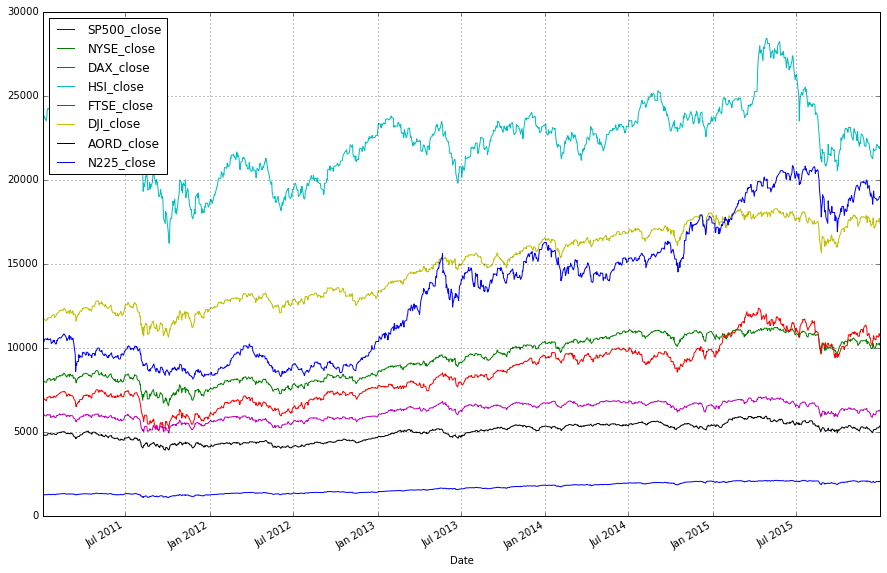

In [31]:
_ = pd.concat([closing_data['SP500_close'],
               closing_data['NYSE_close'], 
               closing_data['DAX_close'], 
               closing_data['HSI_close'],
               closing_data['FTSE_close'],
               closing_data['DJI_close'],
               closing_data['AORD_close'], 
               closing_data['N225_close']], axis=1).plot(grid=True,figsize=(15,10))

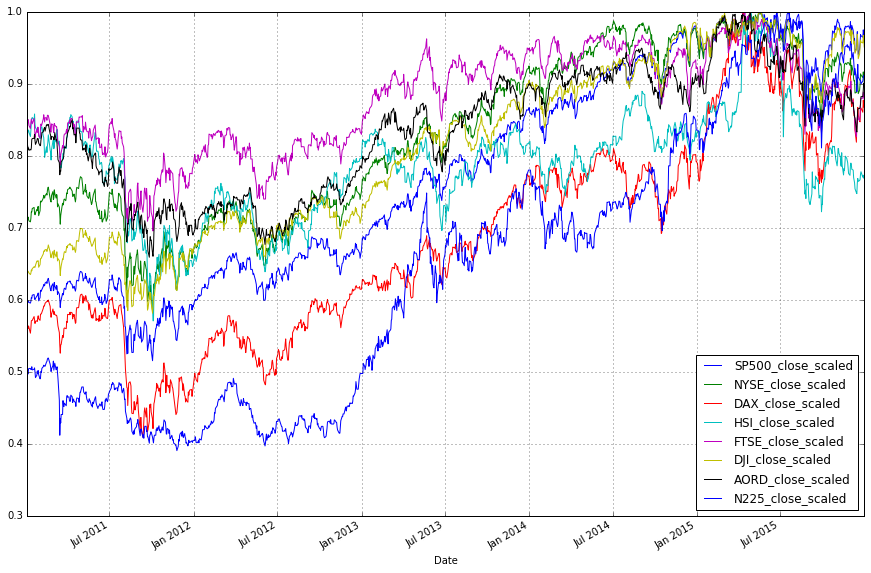

In [32]:
_ = pd.concat([closing_data['SP500_close_scaled'], 
               closing_data['NYSE_close_scaled'], 
               closing_data['DAX_close_scaled'], 
               closing_data['HSI_close_scaled'],
               closing_data['FTSE_close_scaled'],
               closing_data['DJI_close_scaled'],
               closing_data['AORD_close_scaled'], 
               closing_data['N225_close_scaled']], axis=1).plot(grid=True,figsize=(15,10))

Some correlation can be seen from the indices from the past 5 years. 
Next step, we will check the autocorrelation for each of the indices -- corelation between the index value and the latencys
 --- Is yesterday's value predictive for the today's value ?

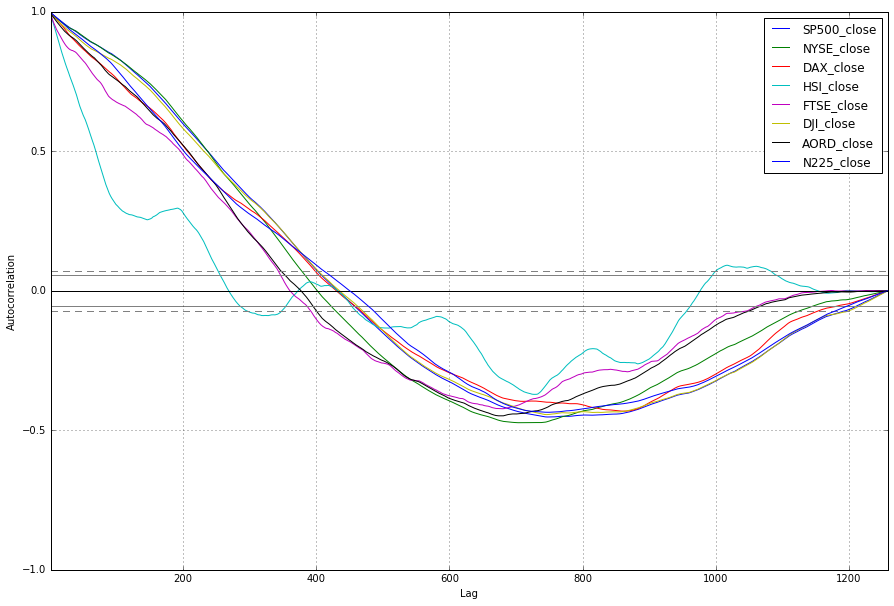

In [33]:
fig = plt.figure()
fig.set_figwidth(15)
fig.set_figheight(10)

_ = autocorrelation_plot(closing_data['SP500_close'], label = 'SP500_close')
_ = autocorrelation_plot(closing_data['NYSE_close'], label = 'NYSE_close')
_ = autocorrelation_plot(closing_data['DAX_close'], label = 'DAX_close')
_ = autocorrelation_plot(closing_data['HSI_close'], label = 'HSI_close')
_ = autocorrelation_plot(closing_data['FTSE_close'], label = 'FTSE_close')
_ = autocorrelation_plot(closing_data['DJI_close'], label = 'DJI_close')
_ = autocorrelation_plot(closing_data['AORD_close'], label = 'AORD_close')
_ = autocorrelation_plot(closing_data['N225_close'], label = 'N225_close')

plt.legend(loc='upper right')
plt.grid()

There is strong autocorrelation on the index latency. This matches the inuitive knowledge, rise of index value is likely to carry on, and vice visa.

Next step, we will construct scatter matrix -- corrlation between each two index value. This will tell us how well each two indexes are correlated.
To make it comparable between two indexes, we will use scaled value

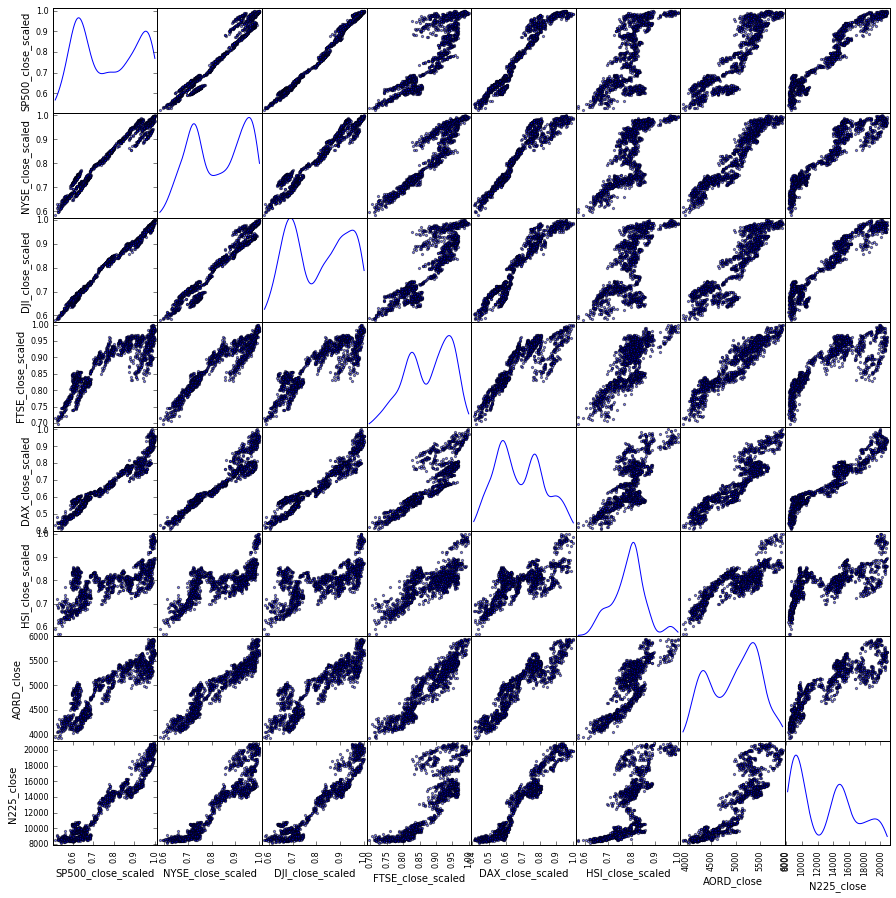

In [34]:
_ = scatter_matrix(pd.concat([closing_data['SP500_close_scaled'], 
                              closing_data['NYSE_close_scaled'], 
                              closing_data['DJI_close_scaled'],
                              closing_data['FTSE_close_scaled'],
                              closing_data['DAX_close_scaled'], 
                              closing_data['HSI_close_scaled'],
                              closing_data['AORD_close'],
                              closing_data['N225_close']], axis=1), figsize=(15, 15), diagonal='kde')

Significant correlation can be observed from the matrix, which supports the assumption that one market is influenced by another. 

Next step, we need to calculate the log return of each index.
This is a common practise in market anlysis, which requirs a stationary time series -- a stochastic process whose joint probability distribution does not change over time. Consequently, parameters such as mean, and variance do not change as time shifted. This is often achieved by looking at the difference between values rather than absolute value. In market analysis, the usual practice is to apply log returns -- ln( V(t) / V(t-1))

In [35]:
log_return_data = pd.DataFrame()

log_return_data['SP500_log_return'] = np.log(closing_data['SP500_close'] / closing_data['SP500_close'].shift())
log_return_data['NYSE_log_return'] = np.log(closing_data['NYSE_close'] / closing_data['NYSE_close'].shift())
log_return_data['DJI_log_return'] = np.log(closing_data['DJI_close'] / closing_data['DJI_close'].shift())
log_return_data['FTSE_log_return'] = np.log(closing_data['FTSE_close'] / closing_data['FTSE_close'].shift())
log_return_data['DAX_log_return'] = np.log(closing_data['DAX_close'] / closing_data['DAX_close'].shift())
log_return_data['HSI_log_return'] = np.log(closing_data['HSI_close'] / closing_data['HSI_close'].shift())
log_return_data['AORD_log_return'] = np.log(closing_data['AORD_close'] / closing_data['AORD_close'].shift())
log_return_data['N225_log_return'] = np.log(closing_data['N225_close'] / closing_data['N225_close'].shift())

log_return_data.describe()

,SP500_log_return,NYSE_log_return,DJI_log_return,FTSE_log_return,DAX_log_return,HSI_log_return,AORD_log_return,N225_log_return
count,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000
mean,0.000377,0.000184,0.000319,0.000045,0.000342,-0.000053,0.000077,0.000481
std,0.009756,0.010057,0.009100,0.009814,0.013398,0.011846,0.009076,0.013708
min,-0.068958,-0.073116,-0.057061,-0.047798,-0.064195,-0.060183,-0.042998,-0.111534
25%,-0.004012,-0.004509,-0.003947,-0.004906,-0.006265,-0.005852,-0.004585,-0.006418
50%,0.000544,0.000468,0.000443,0.000167,0.000701,0.000000,0.000375,0.000153
75%,0.005264,0.005505,0.005203,0.005336,0.006863,0.005717,0.005238,0.008263
max,0.046317,0.051173,0.041533,0.039433,0.052104,0.055187,0.034368,0.074262


Now the mean, min, max are much more similar.  The following graph, which puts all series under the same scale, proves the expectation

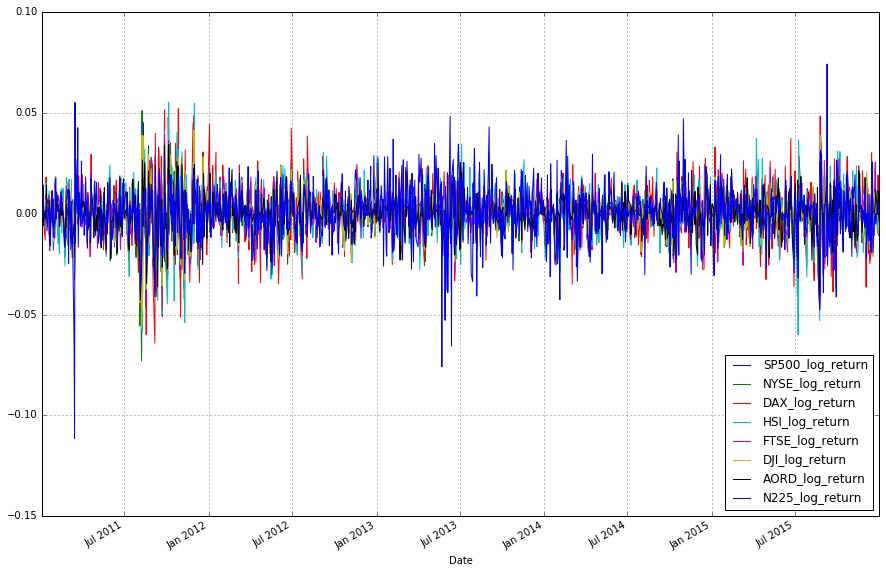

In [36]:
_ = pd.concat([log_return_data['SP500_log_return'],
               log_return_data['NYSE_log_return'],
               log_return_data['DAX_log_return'],
               log_return_data['HSI_log_return'],
               log_return_data['FTSE_log_return'],
               log_return_data['DJI_log_return'],
               log_return_data['AORD_log_return'],
               log_return_data['N225_log_return']], axis=1).plot(figsize=(15, 10))
plt.grid()
plt.legend(loc = 'lower right')

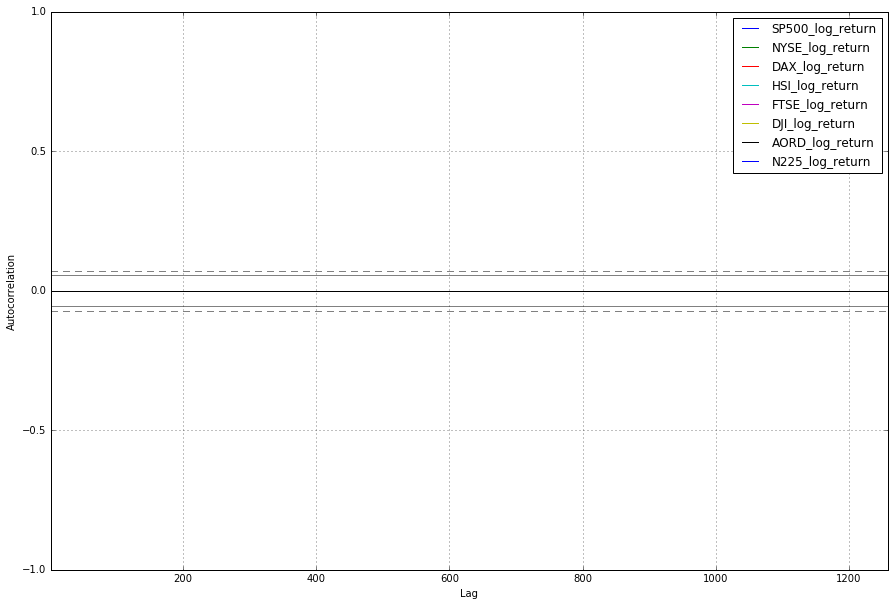

In [37]:
fig = plt.figure()
fig.set_figwidth(15)
fig.set_figheight(10)

_ = autocorrelation_plot(log_return_data['SP500_log_return'], label = 'SP500_log_return')
_ = autocorrelation_plot(log_return_data['NYSE_log_return'], label = 'NYSE_log_return')
_ = autocorrelation_plot(log_return_data['DAX_log_return'], label = 'DAX_log_return')
_ = autocorrelation_plot(log_return_data['HSI_log_return'], label = 'HSI_log_return')
_ = autocorrelation_plot(log_return_data['FTSE_log_return'], label = 'FTSE_log_return')
_ = autocorrelation_plot(log_return_data['DJI_log_return'], label = 'DJI_log_return')
_ = autocorrelation_plot(log_return_data['AORD_log_return'], label = 'AORD_log_return')
_ = autocorrelation_plot(log_return_data['N225_log_return'], label = 'N225_log_return')

plt.grid()

From the log-return graph we can tell that the indexes now are similarly scaled and centered with no trend moving visible. 

From the autocorrelations graph, there is no visible autocorrelation. This is good. Since individual financial market are Markov process, and knowledge of yesterday does not enable one to predict the future.  


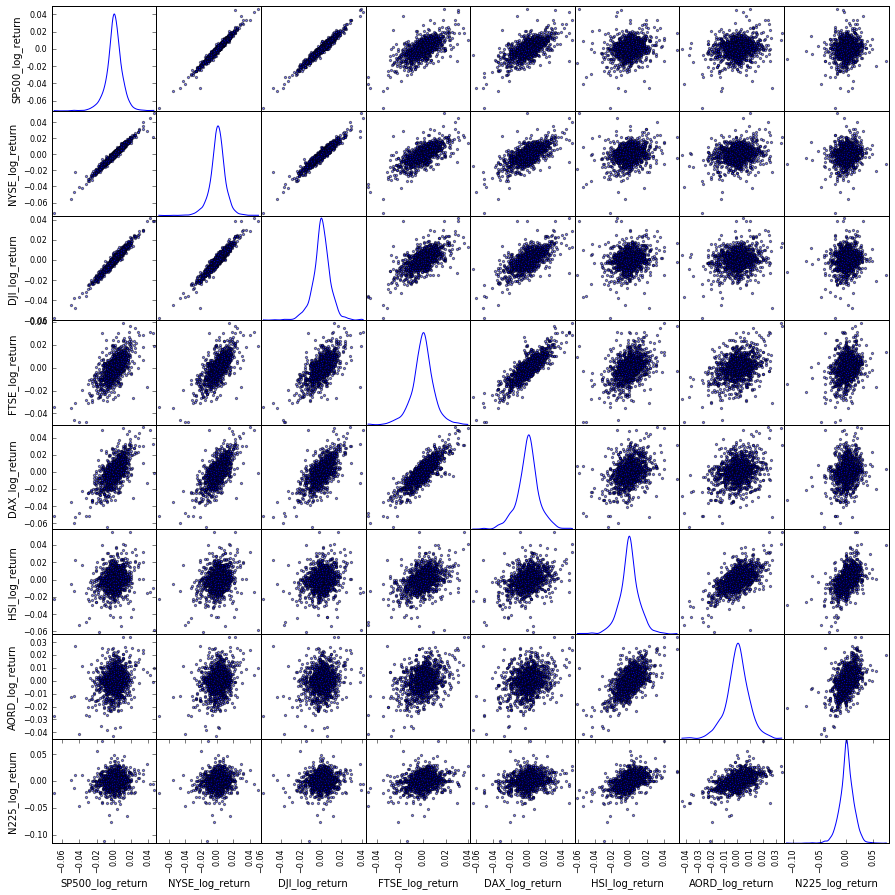

In [38]:
_ = scatter_matrix(log_return_data, figsize=(15,15), diagonal='kde')

The scatter matrix tells more subtle and interesting result.
- The US indices are strongly correlated. This is as expected
- The other indices are less so, but there is structrue and signal. For example, FTSE have some degree of correlation with US indices. 

We can now move on to quantify the correlations, so as to choose the features for our learning model.
First, we will look at  how log returns for SP500 is correlated with other indices, closes available on the same day. We will assume the indices that close before the SP500 are available and the other US indices, which closes later,  are not.

We will test correlations on both today's value, and in 3-day range

In [39]:
test = pd.DataFrame()
test['SP500_0'] = log_return_data['SP500_log_return']
test['NYSE_1'] = log_return_data['NYSE_log_return'].shift() # NYSE value on the same day is not available 
test['DJI_1'] = log_return_data['DJI_log_return'].shift() # DJI value on the same day is not available
test['FTSE_0'] = log_return_data['FTSE_log_return']
test['DAX_0'] = log_return_data['DAX_log_return']
test['N225_0'] = log_return_data['N225_log_return']
test['HSI_0'] = log_return_data['HSI_log_return']
test['AORD_0'] = log_return_data['AORD_log_return']

test.corr().iloc[:, 0]

SP500_0    1.000000
NYSE_1    -0.036894
DJI_1     -0.048440
FTSE_0     0.648865
DAX_0      0.646248
N225_0     0.134001
HSI_0      0.199452
AORD_0     0.213645
Name: SP500_0, dtype: float64

In [40]:
test2 = pd.DataFrame()
test2['SP500_0'] = log_return_data['SP500_log_return']
test2['NYSE_3'] = log_return_data['NYSE_log_return'].shift(3)
test2['DJI_3'] = log_return_data['DJI_log_return'].shift(3)
test2['FTSE_2'] = log_return_data['FTSE_log_return'].shift(2)
test2['DAX_2'] = log_return_data['DAX_log_return'].shift(2)
test2['N225_2'] = log_return_data['N225_log_return'].shift(2)
test2['HSI_2'] = log_return_data['HSI_log_return'].shift(2)
test2['AORD_2'] = log_return_data['AORD_log_return'].shift(2)

test2.corr().iloc[:,0]

SP500_0    1.000000
NYSE_3    -0.088347
DJI_3     -0.081317
FTSE_2     0.011867
DAX_2      0.001999
N225_2    -0.022762
HSI_2     -0.056146
AORD_2    -0.010988
Name: SP500_0, dtype: float64

The correlation analysis shows some features from data prediction:
- European indices from the same day is a strong indicator for SP500 close
- Asian Pacific indices from the same day is a significant indicator for SP500 close

- US indices from the same day is not a good indicator for SP500 close
- Previouse day indices value is not a good indicator for SP500 close. This proves the Markov property of finical market

A potention Machine Learning model can be observerd from above analysis:
- To predict SP500 close price today is an increase or a decrease from close of yesterday.
- All other indices value will be used to traing the model. 
- Three types of data can be applied, T, T-1, T-2, where we will take data available on that day (T means today, T-1 means yesterday, etc..). For example, today's non-US indices, and yesterday's US indices.



To predict SP500 whether increase or descrese, is a typical binary classification problem (or linear regregression)

A few features are included in our analysis, namely, influence of indices from other regions, the same region, and previous historical data. From our analysis, some of the feature shows strong linear correlation, some show moderiate correlation, and others low weak correlation. However, machine learning models are good at detecting weak correlation from data set. And we will apply our usecase to investigate the correlation.

When building a mahcine learning model, there is always trade offs, but a general principle in choosing is Good Data comes before Good Algorithm comes before Good Framework. One will need to cosider all three in designing a Machine Learning Model, but will be in that order of importance.

In [41]:
import tensorflow as tf

Prepare dataset for learning
- Add in all features
- Fill in value for all features

In [42]:
# output result for the positive and negative: Binary Classification
log_return_data['SP500_log_return_positive'] = 0
log_return_data.ix[log_return_data['SP500_log_return'] >= 0, 'SP500_log_return_positive'] = 1
log_return_data['SP500_log_return_negative'] = 0
log_return_data.ix[log_return_data['SP500_log_return'] < 0, 'SP500_log_return_negative'] = 1

# define training data features
learning_data = pd.DataFrame(
  columns=[
    'SP500_log_return_positive', 'SP500_log_return_negative',
    'SP500_log_return_1', 'SP500_log_return_2', 'SP500_log_return_3',
    'NYSE_log_return_1', 'NYSE_log_return_2', 'NYSE_log_return_3',
    'DJI_log_return_1', 'DJI_log_return_2', 'DJI_log_return_3',
    'N225_log_return_0', 'N225_log_return_1', 'N225_log_return_2',
    'HSI_log_return_0', 'HSI_log_return_1', 'HSI_log_return_2',
    'FTSE_log_return_0', 'FTSE_log_return_1', 'FTSE_log_return_2',
    'DAX_log_return_0', 'DAX_log_return_1', 'DAX_log_return_2',
    'AORD_log_return_0', 'AORD_log_return_1', 'AORD_log_return_2'])

# Prepare the training data
for i in range(7, len(log_return_data)):
    # build the data: with data shifting to retrieve value from different days
    SP500_log_return_positive = log_return_data['SP500_log_return_positive'].ix[i]
    SP500_log_return_negative = log_return_data['SP500_log_return_negative'].ix[i]
    SP500_log_return_1 = log_return_data['SP500_log_return'].ix[i-1]
    SP500_log_return_2 = log_return_data['SP500_log_return'].ix[i-2]
    SP500_log_return_3 = log_return_data['SP500_log_return'].ix[i-3]
    NYSE_log_return_1 = log_return_data['NYSE_log_return'].ix[i-1]
    NYSE_log_return_2 = log_return_data['NYSE_log_return'].ix[i-2]
    NYSE_log_return_3 = log_return_data['NYSE_log_return'].ix[i-3]
    DJI_log_return_1 = log_return_data['DJI_log_return'].ix[i-1]
    DJI_log_return_2 = log_return_data['DJI_log_return'].ix[i-2]
    DJI_log_return_3 = log_return_data['DJI_log_return'].ix[i-3]
    N225_log_return_0 = log_return_data['N225_log_return'].ix[i]
    N225_log_return_1 = log_return_data['N225_log_return'].ix[i-1]
    N225_log_return_2 = log_return_data['N225_log_return'].ix[i-2]
    HSI_log_return_0 = log_return_data['HSI_log_return'].ix[i]
    HSI_log_return_1 = log_return_data['HSI_log_return'].ix[i-1]
    HSI_log_return_2 = log_return_data['HSI_log_return'].ix[i-2]
    FTSE_log_return_0 = log_return_data['FTSE_log_return'].ix[i]
    FTSE_log_return_1 = log_return_data['FTSE_log_return'].ix[i-1]
    FTSE_log_return_2 = log_return_data['FTSE_log_return'].ix[i-2]
    DAX_log_return_0 = log_return_data['DAX_log_return'].ix[i]
    DAX_log_return_1 = log_return_data['DAX_log_return'].ix[i-1]
    DAX_log_return_2 = log_return_data['DAX_log_return'].ix[i-2]
    AORD_log_return_0 = log_return_data['AORD_log_return'].ix[i]
    AORD_log_return_1 = log_return_data['AORD_log_return'].ix[i-1]
    AORD_log_return_2 = log_return_data['AORD_log_return'].ix[i-2]
  
    # append to learning_data
    learning_data = learning_data.append(
        {'SP500_log_return_positive':SP500_log_return_positive,
        'SP500_log_return_negative':SP500_log_return_negative,
        'SP500_log_return_1':SP500_log_return_1,
        'SP500_log_return_2':SP500_log_return_2,
        'SP500_log_return_3':SP500_log_return_3,
        'NYSE_log_return_1':NYSE_log_return_1,
        'NYSE_log_return_2':NYSE_log_return_2,
        'NYSE_log_return_3':NYSE_log_return_3,
        'DJI_log_return_1':DJI_log_return_1,
        'DJI_log_return_2':DJI_log_return_2,
        'DJI_log_return_3':DJI_log_return_3,
        'N225_log_return_0':N225_log_return_0,
        'N225_log_return_1':N225_log_return_1,
        'N225_log_return_2':N225_log_return_2,
        'HSI_log_return_0':HSI_log_return_0,
        'HSI_log_return_1':HSI_log_return_1,
        'HSI_log_return_2':HSI_log_return_2,
        'FTSE_log_return_0':FTSE_log_return_0,
        'FTSE_log_return_1':FTSE_log_return_1,
        'FTSE_log_return_2':FTSE_log_return_2,
        'DAX_log_return_0':DAX_log_return_0,
        'DAX_log_return_1':DAX_log_return_1,
        'DAX_log_return_2':DAX_log_return_2,
        'AORD_log_return_0':AORD_log_return_0,
        'AORD_log_return_1':AORD_log_return_1,
        'AORD_log_return_2':AORD_log_return_2},
        ignore_index=True)
  
learning_data.describe()

,SP500_log_return_positive,SP500_log_return_negative,SP500_log_return_1,SP500_log_return_2,SP500_log_return_3,NYSE_log_return_1,NYSE_log_return_2,NYSE_log_return_3,DJI_log_return_1,DJI_log_return_2,...,HSI_log_return_2,FTSE_log_return_0,FTSE_log_return_1,FTSE_log_return_2,DAX_log_return_0,DAX_log_return_1,DAX_log_return_2,AORD_log_return_0,AORD_log_return_1,AORD_log_return_2
count,1251.000000,1251.000000,1251.000000,1251.000000,1251.000000,1251.000000,1251.000000,1251.000000,1251.000000,1251.000000,...,1251.000000,1251.000000,1251.000000,1251.000000,1251.000000,1251.000000,1251.000000,1251.000000,1251.000000,1251.000000
mean,0.541167,0.458833,0.000388,0.000393,0.000383,0.000200,0.000204,0.000195,0.000331,0.000334,...,-0.000059,0.000030,0.000042,0.000043,0.000349,0.000359,0.000357,0.000083,0.000086,0.000080
std,0.498502,0.498502,0.009774,0.009772,0.009768,0.010076,0.010074,0.010071,0.009115,0.009114,...,0.011869,0.009815,0.009818,0.009817,0.013417,0.013422,0.013423,0.009095,0.009095,0.009091
min,0.000000,0.000000,-0.068958,-0.068958,-0.068958,-0.073116,-0.073116,-0.073116,-0.057061,-0.057061,...,-0.060183,-0.047798,-0.047798,-0.047798,-0.064195,-0.064195,-0.064195,-0.042998,-0.042998,-0.042998
25%,0.000000,0.000000,-0.004030,-0.004005,-0.004005,-0.004493,-0.004474,-0.004474,-0.003977,-0.003945,...,-0.005886,-0.004909,-0.004896,-0.004876,-0.006283,-0.006283,-0.006283,-0.004607,-0.004607,-0.004607
50%,1.000000,0.000000,0.000574,0.000574,0.000549,0.000517,0.000517,0.000486,0.000446,0.000446,...,0.000000,0.000167,0.000193,0.000193,0.000734,0.000745,0.000745,0.000376,0.000376,0.000376
75%,1.000000,1.000000,0.005328,0.005328,0.005284,0.005516,0.005516,0.005506,0.005216,0.005216,...,0.005719,0.005324,0.005355,0.005355,0.006869,0.006877,0.006877,0.005260,0.005260,0.005249
max,1.000000,1.000000,0.046317,0.046317,0.046317,0.051173,0.051173,0.051173,0.041533,0.041533,...,0.055187,0.039433,0.039433,0.039433,0.052104,0.052104,0.052104,0.034368,0.034368,0.034368


Prepare training and testing data sets. 80% training, 20% testing

In [43]:
# Prepare the training and test datasets

# Features and results
predictors_tf = learning_data[learning_data.columns[2:]]
classes_tf = learning_data[learning_data.columns[:2]]

# training and testing datasets
training_set_size = int(len(learning_data) * 0.8)
test_set_size = len(learning_data) - training_set_size
training_predictors_tf = predictors_tf[:training_set_size]
training_classes_tf = classes_tf[:training_set_size]
test_predictors_tf = predictors_tf[training_set_size:]
test_classes_tf = classes_tf[training_set_size:]

training_predictors_tf.describe()

,SP500_log_return_1,SP500_log_return_2,SP500_log_return_3,NYSE_log_return_1,NYSE_log_return_2,NYSE_log_return_3,DJI_log_return_1,DJI_log_return_2,DJI_log_return_3,N225_log_return_0,...,HSI_log_return_2,FTSE_log_return_0,FTSE_log_return_1,FTSE_log_return_2,DAX_log_return_0,DAX_log_return_1,DAX_log_return_2,AORD_log_return_0,AORD_log_return_1,AORD_log_return_2
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.000483,0.000492,0.000495,0.000308,0.000315,0.000317,0.000426,0.000432,0.000433,0.000507,...,-0.000008,0.000085,0.000097,0.000090,0.000341,0.000358,0.000345,0.000117,0.000112,0.000114
std,0.009777,0.009771,0.009770,0.010212,0.010208,0.010207,0.008955,0.008951,0.008951,0.013888,...,0.011618,0.009508,0.009512,0.009513,0.013018,0.013022,0.013029,0.008764,0.008763,0.008763
min,-0.068958,-0.068958,-0.068958,-0.073116,-0.073116,-0.073116,-0.057061,-0.057061,-0.057061,-0.111534,...,-0.058270,-0.047792,-0.047792,-0.047792,-0.064195,-0.064195,-0.064195,-0.042998,-0.042998,-0.042998
25%,-0.003787,-0.003752,-0.003722,-0.004385,-0.004378,-0.004347,-0.003553,-0.003524,-0.003524,-0.006637,...,-0.005476,-0.004672,-0.004672,-0.004684,-0.005715,-0.005715,-0.005788,-0.004488,-0.004488,-0.004488
50%,0.000708,0.000708,0.000708,0.000788,0.000788,0.000788,0.000605,0.000605,0.000605,0.000040,...,0.000000,0.000208,0.000226,0.000208,0.000694,0.000700,0.000700,0.000410,0.000399,0.000410
75%,0.005383,0.005383,0.005383,0.005704,0.005704,0.005704,0.005144,0.005144,0.005144,0.008423,...,0.005766,0.005140,0.005214,0.005214,0.006563,0.006565,0.006565,0.005122,0.005122,0.005122
max,0.046317,0.046317,0.046317,0.051173,0.051173,0.051173,0.041533,0.041533,0.041533,0.055223,...,0.055187,0.039433,0.039433,0.039433,0.052104,0.052104,0.052104,0.034368,0.034368,0.034368


In [44]:
test_predictors_tf.describe()

,SP500_log_return_1,SP500_log_return_2,SP500_log_return_3,NYSE_log_return_1,NYSE_log_return_2,NYSE_log_return_3,DJI_log_return_1,DJI_log_return_2,DJI_log_return_3,N225_log_return_0,...,HSI_log_return_2,FTSE_log_return_0,FTSE_log_return_1,FTSE_log_return_2,DAX_log_return_0,DAX_log_return_1,DAX_log_return_2,AORD_log_return_0,AORD_log_return_1,AORD_log_return_2
count,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,...,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000
mean,0.000009,-0.000004,-0.000065,-0.000232,-0.000235,-0.000290,-0.000049,-0.000058,-0.000114,0.000346,...,-0.000263,-0.000190,-0.000181,-0.000144,0.000380,0.000364,0.000407,-0.000052,-0.000016,-0.000057
std,0.009771,0.009782,0.009764,0.009526,0.009529,0.009516,0.009736,0.009743,0.009720,0.013136,...,0.012845,0.010973,0.010969,0.010964,0.014931,0.014934,0.014917,0.010327,0.010329,0.010311
min,-0.040211,-0.040211,-0.040211,-0.040610,-0.040610,-0.040610,-0.036402,-0.036402,-0.036402,-0.047151,...,-0.060183,-0.047798,-0.047798,-0.047798,-0.048165,-0.048165,-0.048165,-0.041143,-0.041143,-0.041143
25%,-0.004690,-0.004690,-0.004774,-0.004907,-0.004907,-0.005006,-0.005235,-0.005235,-0.005235,-0.005044,...,-0.006784,-0.005864,-0.005864,-0.005718,-0.008836,-0.008836,-0.008590,-0.005429,-0.005429,-0.005429
50%,-0.000340,-0.000340,-0.000348,-0.000200,-0.000200,-0.000260,-0.000189,-0.000189,-0.000232,0.000595,...,0.000000,0.000046,0.000046,0.000110,0.001079,0.001079,0.001079,0.000229,0.000252,0.000229
75%,0.005194,0.005194,0.005162,0.004787,0.004787,0.004522,0.005856,0.005856,0.005620,0.007662,...,0.005274,0.005548,0.005548,0.005548,0.009181,0.009181,0.009181,0.006278,0.006278,0.006186
max,0.038291,0.038291,0.038291,0.029209,0.029209,0.029209,0.038755,0.038755,0.038755,0.074262,...,0.040211,0.034971,0.034971,0.034971,0.048521,0.048521,0.048521,0.025518,0.025518,0.025518


Define a helper function  to handle learning metrics for the, including the following 4 values:
- Accuracy : (TP + TN) / (TP + TN + FP + FN)
- Precision : TP / (TP + FP)
- Recall: TP / (TP + FN)
- F1 Score: (2 * (precision * recall)) / (precision + recall) ---- best at 1.0, worst at 0.0


In [45]:
def tf_training_metrics(model, actual_classes, session, feed_dict):
    predictions = tf.argmax(model, 1)
    actuals = tf.argmax(actual_classes, 1)
    
    # masks for calculating tp, tn, fp, fn
    ones_like_predictions = tf.ones_like(predictions)
    zeros_like_predictions = tf.zeros_like(predictions)
    ones_like_actuals = tf.ones_like(actuals)
    zeros_like_actuals = tf.zeros_like(actuals)
    
    # True Positive
    tp_op = tf.reduce_sum(
        tf.cast(
            tf.logical_and(
                tf.equal(actuals, ones_like_actuals),
                tf.equal(predictions, ones_like_predictions)
            ), 
            "float"
        )
    )
    
    # True Negative
    tn_op = tf.reduce_sum(
        tf.cast(
            tf.logical_and(
                tf.equal(actuals, zeros_like_actuals),
                tf.equal(predictions, zeros_like_predictions)
            ),
            "float"
        )
    )
    
    # False Positive
    fp_op = tf.reduce_sum(
        tf.cast(
            tf.logical_and(
                tf.equal(actuals, zeros_like_actuals),
                tf.equal(predictions, ones_like_predictions)
            ),
            "float"
        )
    )
    
    # False Negative
    fn_op = tf.reduce_sum(
        tf.cast(
            tf.logical_and(
                tf.equal(actuals, ones_like_actuals),
                tf.equal(predictions, zeros_like_predictions)
            ),
            "float"
        )
    )
    
    # running the sessions
    tp, tn, fp, fn = session.run([tp_op, tn_op, fp_op, fn_op], feed_dict)
    
    # calculate the metrics
    accuracy = (float(tp) + float(tn)) / (float(tp) + float(tn) + float(fp) + float(fn))
    precision = float(tp) / (float(tp) + float(fp))
    recall = float(tp) / (float(tp) + float(fn))
    f1_score = (2 * (precision * recall)) / (precision + recall)
    
    print("Accuracy = {:.6f}".format(accuracy))
    print("Precision = {:.6f}".format(precision))
    print("Recall = {:.6f}".format(recall))
    print("F1 Score = {:.6f}".format(f1_score))

In [46]:
sess = tf.Session()

num_predictors = len(training_predictors_tf.columns)
num_classes = len(training_classes_tf.columns)

# Placeholders for data fed into the session
feature_data = tf.placeholder("float", [None, num_predictors])
actual_classes = tf.placeholder("float", [None, num_classes])

# weights matrix, initialized with small random numbers
weights = tf.Variable(tf.truncated_normal([num_predictors, num_classes], stddev=0.0001))
biases = tf.Variable(tf.ones([num_classes]))

# Construct the training model
# A softmax regression will be used in this test
model = tf.nn.softmax(tf.matmul(feature_data, weights) + biases)
# cost function: cross entropy
cost = -tf.reduce_sum(actual_classes * tf.log(model))
# training step: gradient descent -- learning rate: 0.0001
training_step = tf.train.AdamOptimizer(learning_rate=0.0001).minimize(cost)

init = tf.initialize_all_variables()
sess.run(init)

We will train the model with 30000 iterations, with full dataset each time. Result will be output every 5000 iterations.

In [47]:
correct_prediction = tf.equal(tf.argmax(model, 1), tf.argmax(actual_classes, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

print ("Iteration\tAccuracy")
for i in range(1, 30001):
    sess.run(
        training_step,
        feed_dict={
            feature_data: training_predictors_tf.values,
            actual_classes: training_classes_tf.values.reshape(len(training_classes_tf.values), 2)
        }
    )
    
    if i % 5000 == 0:
        print("{}:\t{:.6f}".format(
            i, 
            sess.run(
                accuracy,
                feed_dict={
                    feature_data: training_predictors_tf.values,
                    actual_classes: training_classes_tf.values.reshape(len(training_classes_tf.values), 2)
                }
            )
        )
        )

Iteration	Accuracy


5000:	0.560000


10000:	0.567000


15000:	0.585000


20000:	0.604000


25000:	0.637000


30000:	0.654000


In [48]:
feed_dict = {
    feature_data: test_predictors_tf.values,
    actual_classes: test_classes_tf.values.reshape(len(test_classes_tf.values), 2)
}

tf_training_metrics(model, actual_classes, sess, feed_dict)

Accuracy = 0.601594
Precision = 0.944444
Recall = 0.257576
F1 Score = 0.404762


End training accuracy of 60% is not too bad. F1 score of 0.40 is also alright.
Given the simplicity of the model we are currently using, the result is acceptable.

Next, we will add two hidden layers to the model, to make a slightly better model. 

In [62]:
sess_1 = tf.Session()

num_predictors = len(training_predictors_tf.columns)
num_classes = len(training_classes_tf.columns)

# Placeholders for features and actual classes
feature_data = tf.placeholder("float", [None, num_predictors])
actual_classes = tf.placeholder("float", [None, 2])

# Weights and bias for each layer of the NN model
weights_1 = tf.Variable(tf.truncated_normal([24, 50], stddev=0.0001))
biases_1 = tf.Variable(tf.ones([50]))

weights_2 = tf.Variable(tf.truncated_normal([50, 25], stddev=0.0001))
biases_2 = tf.Variable(tf.ones([25]))

weights_3 = tf.Variable(tf.truncated_normal([25, 2], stddev=0.0001))
biases_3 = tf.Variable(tf.ones([2]))

# Build hidden layers in the NN, to construct the whole NN model
hidden_layer_1 = tf.nn.relu(tf.matmul(feature_data, weights_1) + biases_1)
hidden_layer_2 = tf.nn.relu(tf.matmul(hidden_layer_1, weights_2) + biases_2)
model = tf.nn.softmax(tf.matmul(hidden_layer_2, weights_3) + biases_3)


cost = -tf.reduce_sum(actual_classes * tf.log(model))
train_op_1 = tf.train.AdamOptimizer(learning_rate = 0.0001).minimize(cost)

init = tf.initialize_all_variables()
sess_1.run(init)

In [63]:
correct_prediction = tf.equal(tf.argmax(model, 1), tf.argmax(actual_classes, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

print("Iterations\tAccuracy")
for i in range(1, 15001):
    sess_1.run(
        train_op_1,
        feed_dict={
            feature_data: training_predictors_tf.values,
            actual_classes: training_classes_tf.values.reshape(len(training_classes_tf.values), 2)
        }
    )
    
    if i % 3000 == 0:
        print("{}:\t{:.15f}".format(
            i,
            sess_1.run(
                accuracy,
                feed_dict={
                    feature_data: training_predictors_tf.values,
                    actual_classes: training_classes_tf.values.reshape(len(training_classes_tf.values), 2)
                }
            )
        )
        )

Iterations	Accuracy


3000:	0.614000022411346


6000:	0.776000022888184


9000:	0.771000027656555


12000:	0.771000027656555


15000:	0.771000027656555


In [64]:
feed_dict = {
    feature_data: test_predictors_tf.values,
    actual_classes: test_classes_tf.values.reshape(len(test_classes_tf.values), 2)
}

tf_training_metrics(model, actual_classes, sess_1, feed_dict)

Accuracy = 0.689243
Precision = 0.745455
Recall = 0.621212
F1 Score = 0.677686


By applying the 2-Layer Neural Network model, we receive clear improvement in the Precision and Accuracy. It proves better model can help to detect more sutle correlation between features. Accruracy of around 70% is farely impressive, given the simplicy of our current feature selection and a build in deep learning model. 

TensorFlow offers a very good playground to quickly prototyping Deep Learning Models to detect possible feature correlations. Combined with Python's popular data analysis libraries, like NumPy, Pandas, along with the easy to us iPython Notebook editor, interactive financial data analysis and feature detections become very easy to implement. 

Selecting Machine Learning Models and Parameteres Calibration used to be time-consuming process in training workable model, with TensorFlows this process becomes much easier, enabling researchers and practitioners to focus on thinking and desining ideas, without being disturbed much away from implementation details. Google also provides a useful visualisation tool in its deep learning suite, TensorBoard, which enables visulisation of Learning Model Strucutrues, as well as learning metrics evloving. It helps for intereactive development and investigation.

There is some learning gap when first using TensorFlow, especially the unique desing of separting Operators and Sessions (Definining model is separated from running model, so to get any value, even a simple constant, you need to run the model), but it is an elegant implementaion of the model design, and shouldn't be a new concept for people with functional programming experience. Once become familar with the development, it will add very useful value in terms of financial data analysis